In [1]:
#!pip install panads
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import openpyxl
from scipy import stats
from scipy.stats import zscore
from scipy.stats import norm
from scipy.stats import ks_2samp
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
with open('Dating_app.pkl', 'rb') as file:
    df = pickle.load(file)

In [3]:
df.head()

,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,...,lang_es,lang_pt,isVerified,shareProfileEnabled,lastOnline,hasBirthday,crypt,userId,isSystemProfile,locked
0,M,25,daeni,1.00,4,8279,239,0.0,3.0,1,...,0,0,0,1.0,25/04/2015 20:43,0,0.0,4e3842f79b70e7ea57000064,0.0,0.0
1,M,22,italiana 92,0.85,5,663,13,0.0,0.0,1,...,0,0,0,1.0,26/04/2015 09:19,0,0.0,4e3d34bf5d2bce7b160006a3,0.0,0.0
2,M,21,Lauraaa,0.00,4,1369,88,0.0,2.0,0,...,0,0,0,1.0,06/04/2015 14:24,0,0.0,4ec96c090dc82cb25d00000a,0.0,NaN
3,none,20,Qqkwmdowlo,0.12,3,22187,1015,2.0,3.0,1,...,0,0,0,1.0,07/04/2015 11:21,0,0.0,4eef8b81ebf2c8f64000000c,0.0,NaN
4,M,21,schaessie 3,0.15,12,35262,1413,9.0,12.0,1,...,0,0,0,1.0,06/04/2015 14:25,0,0.0,4ef3cc5aa9d0b3d07d000017,0.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4008 entries, 0 to 6922
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genderLooking           3992 non-null   string 
 1   age                     4008 non-null   int64  
 2   name                    4008 non-null   string 
 3   counts_details          4008 non-null   float64
 4   counts_pictures         4008 non-null   int64  
 5   counts_profileVisits    4008 non-null   int64  
 6   counts_kisses           4008 non-null   int64  
 7   counts_fans             3992 non-null   float64
 8   counts_g                3992 non-null   float64
 9   flirtInterests_chat     4008 non-null   int64  
 10  flirtInterests_friends  4008 non-null   int64  
 11  flirtInterests_date     4008 non-null   int64  
 12  country                 4008 non-null   string 
 13  city                    4008 non-null   string 
 14  locationCity            4008 non-null   

In [5]:
df.describe()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,...,lang_de,lang_it,lang_es,lang_pt,isVerified,shareProfileEnabled,hasBirthday,crypt,isSystemProfile,locked
count,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,3992.000000,3992.000000,4008.000000,4008.000000,4008.000000,...,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,3992.000000,4008.000000,4008.00000,4008.000000,25.0
mean,21.990519,0.570549,4.794910,3705.817864,156.537425,2.335421,0.125501,0.626747,0.627745,0.387475,...,0.644461,0.052146,0.018713,0.010479,0.219561,0.960671,0.003743,0.01522,0.000499,0.6
std,1.957474,0.326349,4.416528,6835.404842,377.031649,12.235699,1.238945,0.483729,0.483466,0.487234,...,0.478736,0.222349,0.135525,0.101842,0.414001,0.194400,0.061069,0.12244,0.022336,0.5
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0
25%,20.000000,0.310000,2.000000,383.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.0
50%,22.000000,0.620000,4.000000,1221.000000,44.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.0
75%,24.000000,0.850000,6.000000,4083.000000,141.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,1.0
max,28.000000,1.000000,30.000000,164425.000000,9288.000000,241.000000,43.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.0


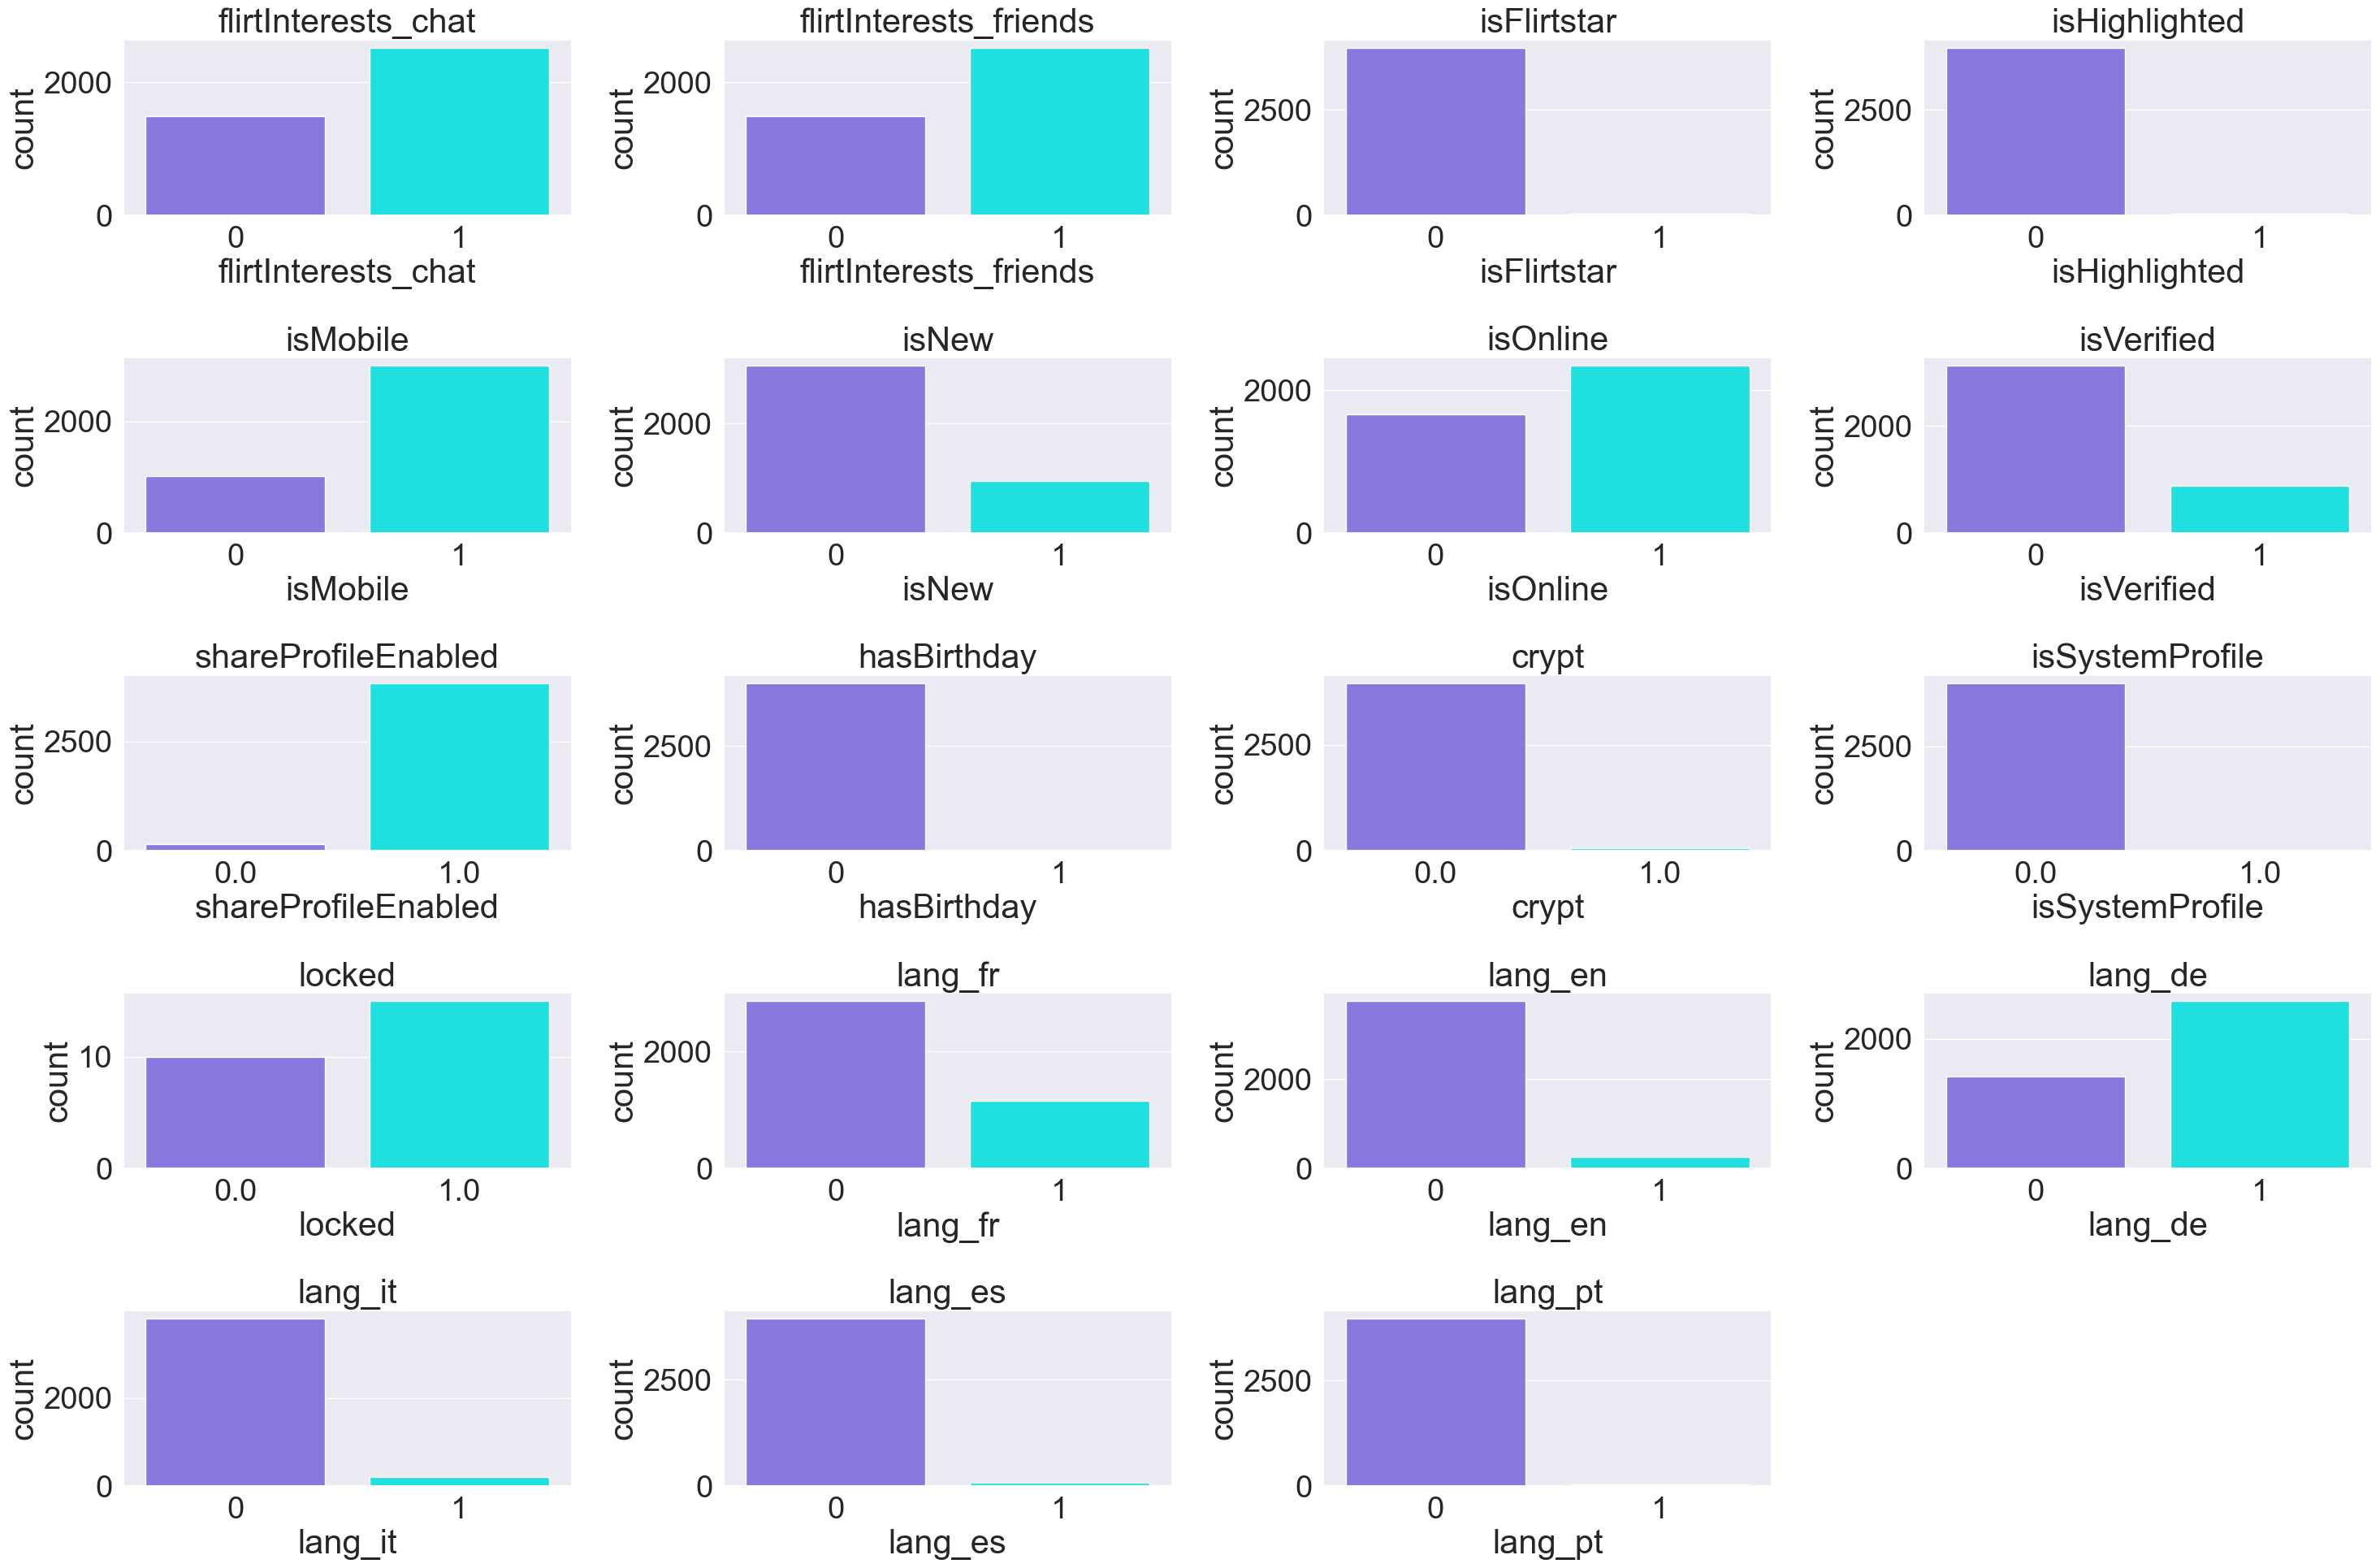

In [6]:
#bool columns

cols_dummy = ['flirtInterests_chat', 'flirtInterests_friends', 'isFlirtstar', 
              'isHighlighted', 'isMobile', 'isNew', 'isOnline', 'isVerified', 
              'shareProfileEnabled', 'hasBirthday', 'crypt', 'isSystemProfile', 
              'locked', 'lang_fr', 'lang_en', 'lang_de', 'lang_it', 'lang_es', 
              'lang_pt']

dum_df = df[cols_dummy]

# Automatically adjust rows and columns based on the number of plots
num_plots = len(dum_df.columns)
a = int(np.ceil(np.sqrt(num_plots)))  # Number of rows
b = int(np.ceil(num_plots / a))       # Number of columns
c = 1  # Initialize plot counter

fig = plt.figure(figsize=(30, 20))
plt.subplots_adjust(hspace=0.5)
sns.set(font_scale=2.5)

for i in dum_df:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i))
    plt.xlabel(i)
    sns.countplot(dum_df[i], palette=['mediumslateblue', 'cyan'])
    c += 1

fig.tight_layout()
plt.show()


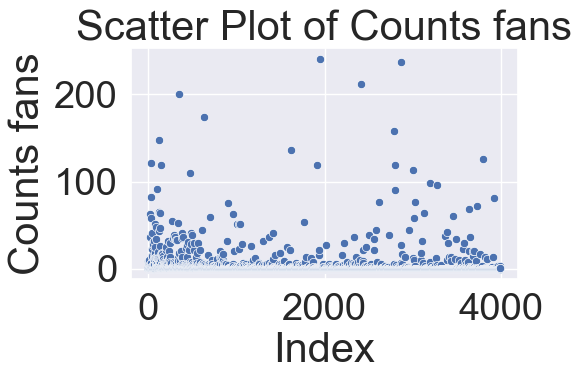

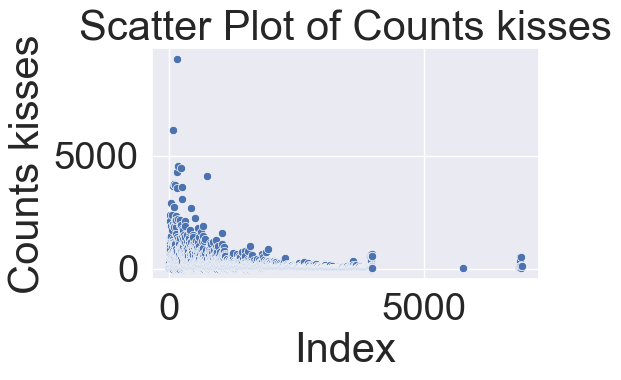

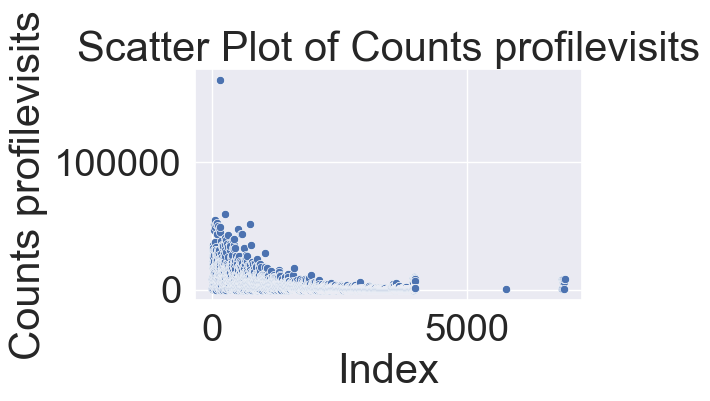

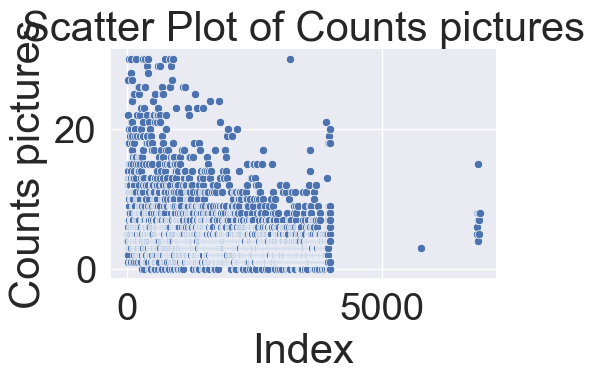

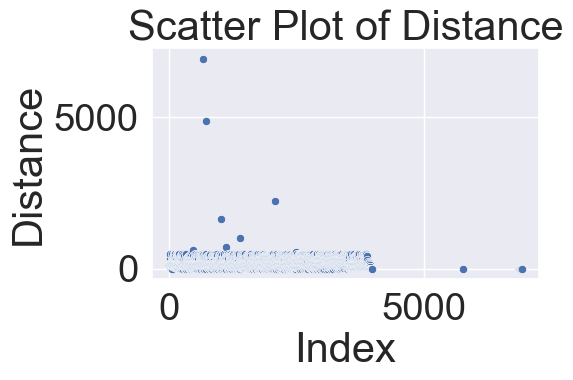

In [7]:
cols= ['counts_fans','counts_kisses','counts_profileVisits','counts_pictures','distance']
con_df = df[cols]

for column in con_df:
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x=df.index, y=df[column])
    plt.xlabel('Index')
    plt.ylabel(column.replace('_', ' ').capitalize())
    plt.title(f'Scatter Plot of {column.replace("_", " ").capitalize()}')
    plt.show()


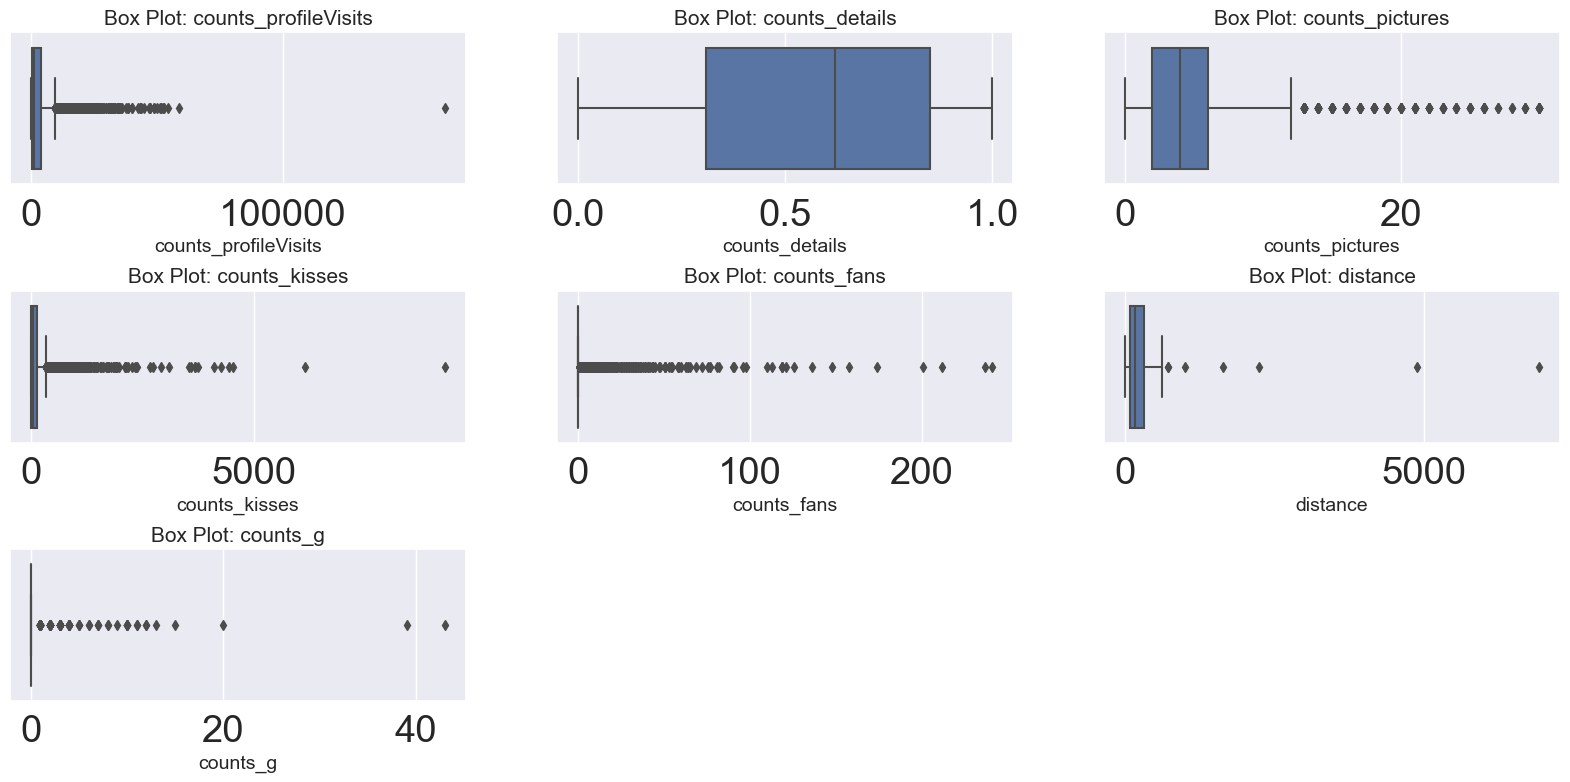

In [8]:
cols= ['counts_profileVisits','counts_details','counts_pictures','counts_kisses','counts_fans','distance','counts_g']
con_df = df[cols]
## Using box (Wiskers) plot 
plt.figure(figsize=(20,200))

def outliers_boxplot(df):
    for i, col in enumerate(df.columns):
        
            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=df, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7)
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)
        
outliers_boxplot(con_df)

In [9]:
#categorical columns
cols_cat= ['lang_count','country','genderLooking','age']
cat_df = df[cols_cat]
cat_df

,lang_count,country,genderLooking,age
0,1,CH,M,25
1,3,CH,M,22
2,0,CH,M,21
3,2,CA,none,20
4,1,DE,M,21
...,...,...,...,...
6892,2,Other,<NA>,23
6900,1,Other,<NA>,24
6908,1,Other,<NA>,21
6910,2,Other,<NA>,23


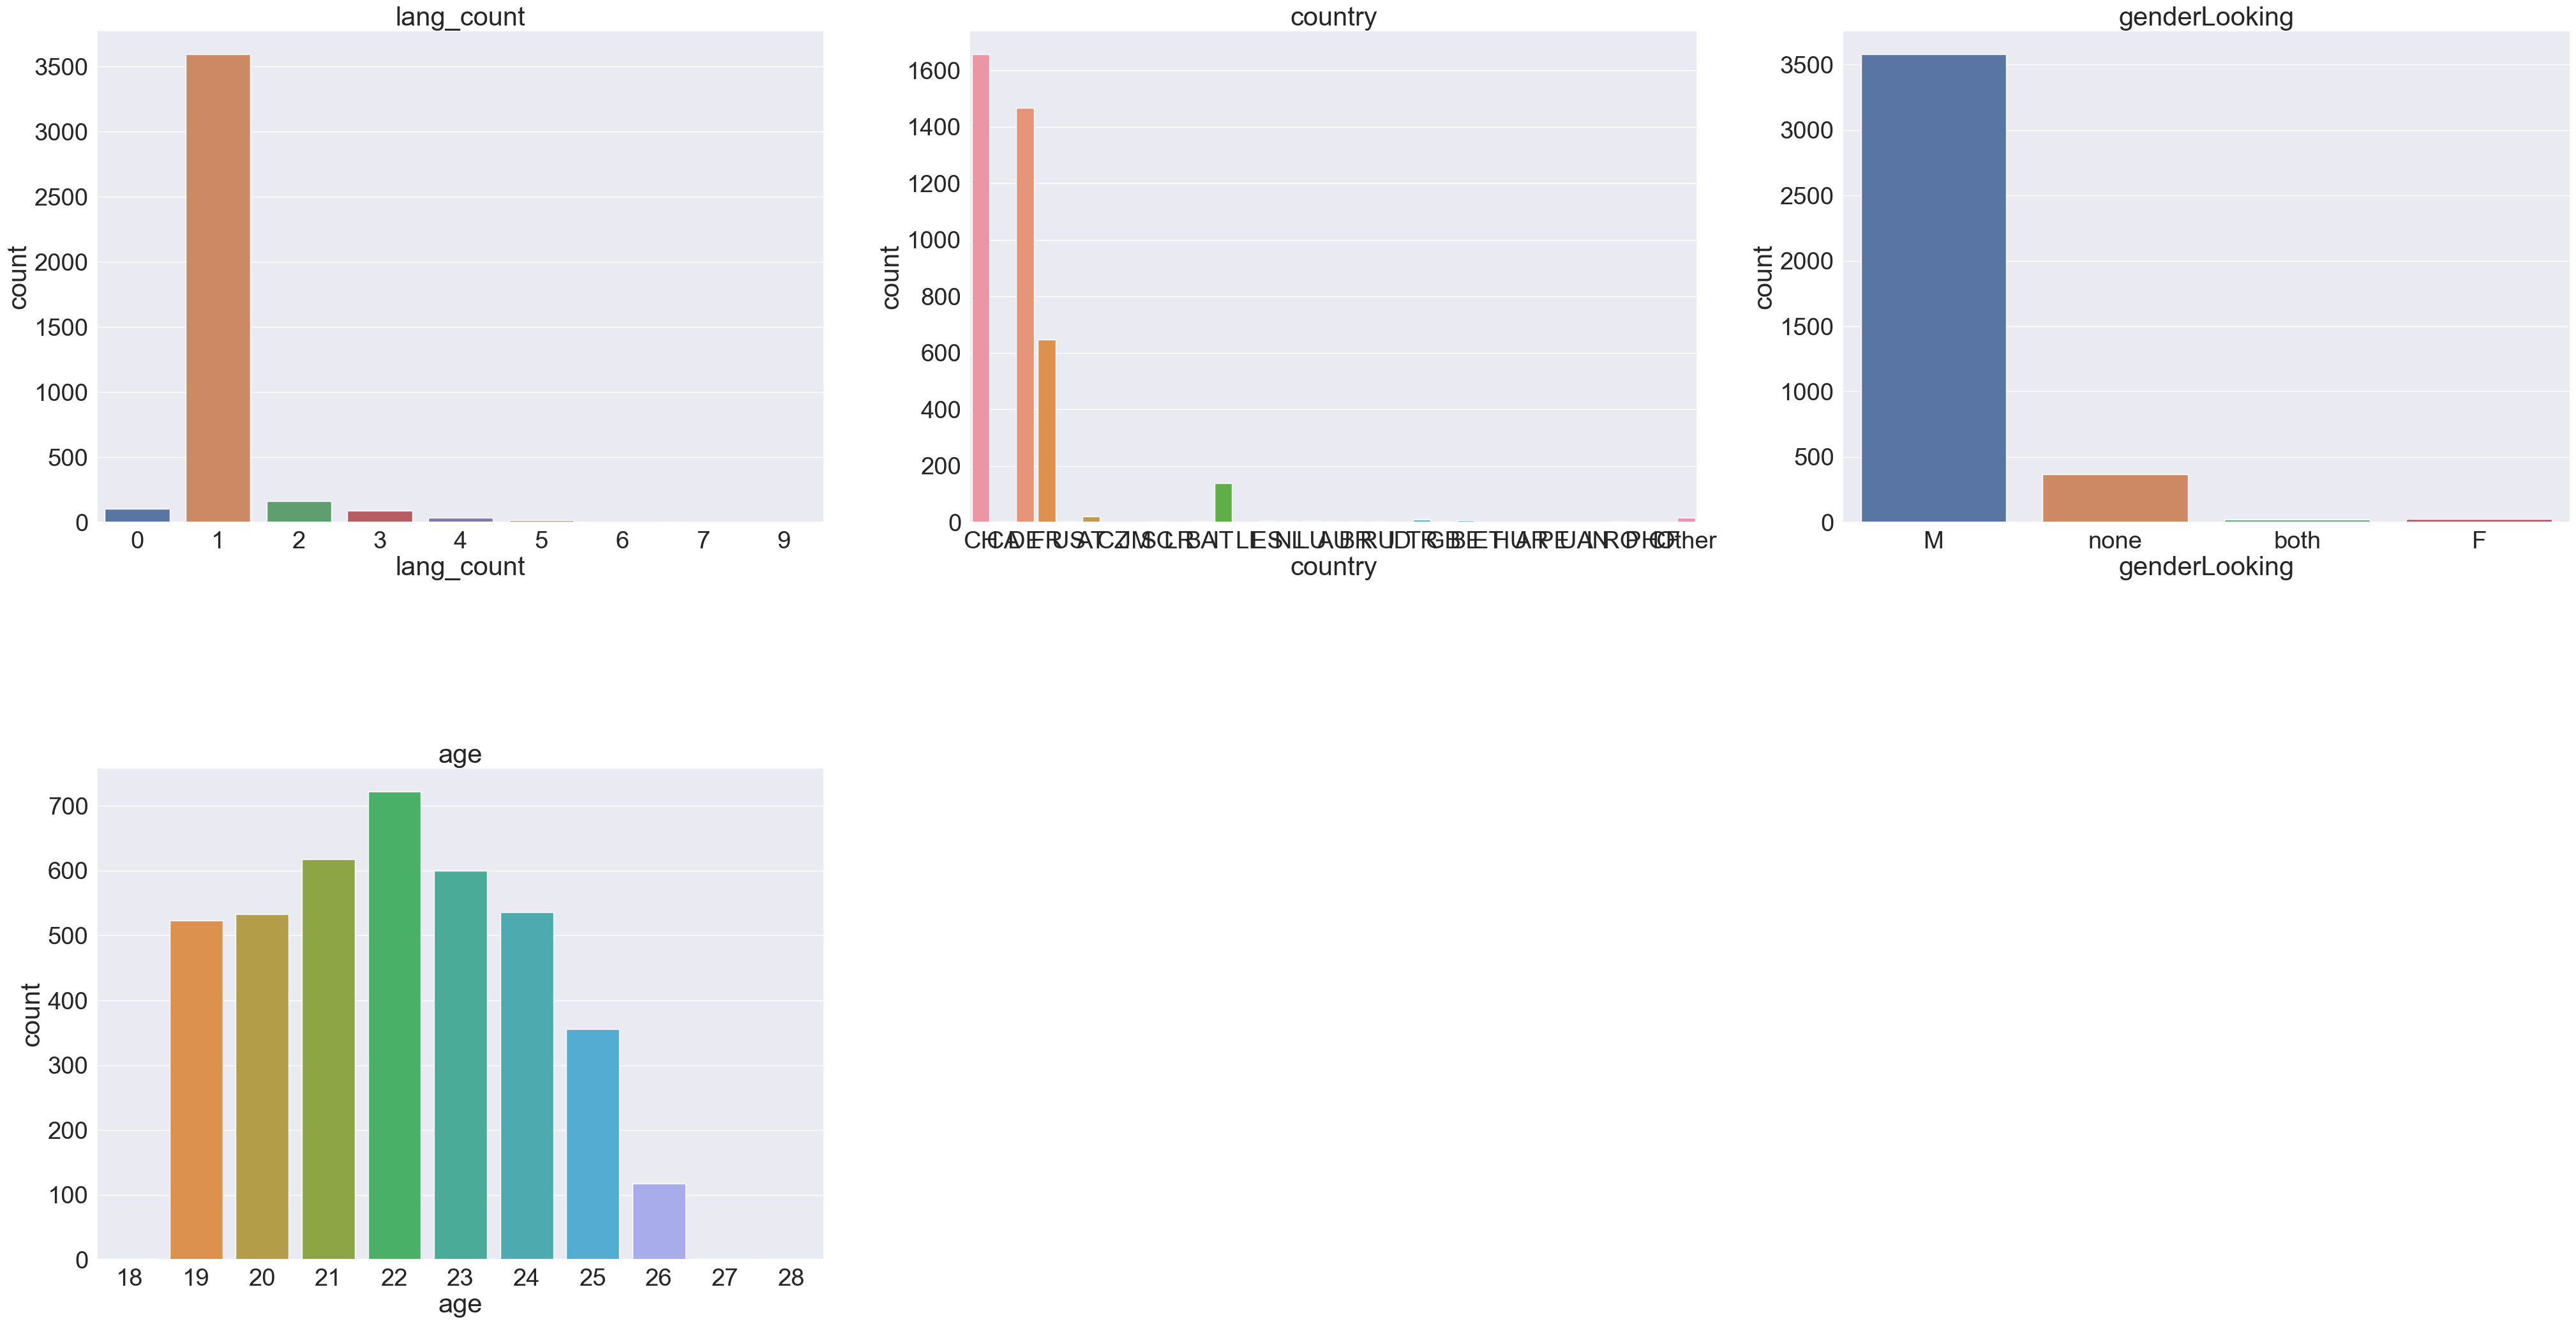

In [10]:
plot_categorical = lambda col: sns.countplot(x=col, data=cat_df)
a = 3  # number of rows
b = 3  # number of columns
c = 1  # plot counter

fig = plt.figure(figsize=(50,40))
plt.subplots_adjust(hspace = 0.5)
sns.set(font_scale = 2.5)
for i in cat_df:

        plt.subplot(a, b, c)
        plt.title('{}'.format(i))
        plt.xlabel(i)
        sns.countplot(cat_df[i])
        c = c + 1

plt.show()

In [11]:
def outliers_df(df):
    total_outliers = pd.DataFrame(columns=['Outlier count', 'Percent'])

    for col in con_df:  # Ensure processing numeric columns only
        temp = pd.DataFrame(df[col])
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        # Filter rows that are outliers in either direction
        temp_outliers = temp[(temp[col] > upper_limit) | (temp[col] < lower_limit)]
        num_outliers = len(temp_outliers)
        total_outliers.loc[col] = [num_outliers, num_outliers / len(df) * 100]

    return total_outliers[total_outliers['Percent'] > 0]

# Assume con_df is your DataFrame
# Call the function and sort results
outliers_df = outliers_df(con_df).sort_values('Percent', ascending=False)
outliers_df

,Outlier count,Percent
counts_fans,973.0,24.276447
counts_kisses,448.0,11.177645
counts_profileVisits,414.0,10.329341
counts_pictures,241.0,6.012974
counts_g,134.0,3.343313
distance,7.0,0.174651


In [12]:
def outliers(df):
    label_out_df = df.copy()
    for col in label_out_df:
        if col in outliers_df.index:
            Q1 = label_out_df[col].quantile(0.25)
            Q3 = label_out_df[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            label_out_df[col] = np.where(label_out_df[col] > upper_limit,'Outlier',np.where(label_out_df[col] < lower_limit,'Outlier',label_out_df[col]))
    return label_out_df
new_df_outliers = outliers(df)
new_df_outliers.head(10)

,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,...,lang_es,lang_pt,isVerified,shareProfileEnabled,lastOnline,hasBirthday,crypt,userId,isSystemProfile,locked
0,M,25,daeni,1.00,4,Outlier,Outlier,0.0,Outlier,1,...,0,0,0,1.0,25/04/2015 20:43,0,0.0,4e3842f79b70e7ea57000064,0.0,0.0
1,M,22,italiana 92,0.85,5,663,13,0.0,0.0,1,...,0,0,0,1.0,26/04/2015 09:19,0,0.0,4e3d34bf5d2bce7b160006a3,0.0,0.0
2,M,21,Lauraaa,0.00,4,1369,88,0.0,Outlier,0,...,0,0,0,1.0,06/04/2015 14:24,0,0.0,4ec96c090dc82cb25d00000a,0.0,NaN
3,none,20,Qqkwmdowlo,0.12,3,Outlier,Outlier,Outlier,Outlier,1,...,0,0,0,1.0,07/04/2015 11:21,0,0.0,4eef8b81ebf2c8f64000000c,0.0,NaN
4,M,21,schaessie 3,0.15,Outlier,Outlier,Outlier,Outlier,Outlier,1,...,0,0,0,1.0,06/04/2015 14:25,0,0.0,4ef3cc5aa9d0b3d07d000017,0.0,NaN
5,M,24,Baby dee,0.81,Outlier,Outlier,180,0.0,Outlier,1,...,0,0,0,1.0,08/04/2015 14:37,0,0.0,4ef9434cca61bece6a000002,0.0,NaN
6,none,24,Anna,0.65,Outlier,Outlier,Outlier,0.0,Outlier,0,...,0,0,0,1.0,27/04/2015 19:29,0,0.0,4f10cbc1883fa97a5f000015,0.0,NaN
7,M,23,Feelinchen,0.81,6,Outlier,Outlier,0.0,Outlier,1,...,0,0,0,0.0,08/04/2015 14:18,0,0.0,4f317525883fa9636900000e,0.0,NaN
8,M,20,chantal,0.88,Outlier,Outlier,Outlier,Outlier,Outlier,1,...,0,0,0,1.0,07/04/2015 20:01,0,0.0,4f3516420c84d3dd23000001,0.0,NaN
9,M,24,rina1990,0.81,1,Outlier,147,Outlier,Outlier,1,...,0,0,0,1.0,06/04/2015 16:10,0,0.0,4fa0fb54883fa90e0d0005d6,0.0,NaN


In [13]:
df_outliers = new_df_outliers.isin(['Outlier']) 
df_outliers = df_outliers.astype('int')
df_outliers

,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,...,lang_es,lang_pt,isVerified,shareProfileEnabled,lastOnline,hasBirthday,crypt,userId,isSystemProfile,locked
0,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6900,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6910,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def capping(df):
    temp = df.copy()
    for col in temp:
        if col in outliers_df.index:
            Q1 = temp[col].quantile(0.25)
            Q3 = temp[col].quantile(0.75)
            upper_limit = Q1 + 1.5 * (Q3-Q1)
            lower_limit = Q3 - 1.5 * (Q3-Q1)
            temp[col] = np.where(temp[col] > upper_limit,np.nan,np.where(temp[col] < lower_limit,np.nan,temp[col]))
    return temp
temp = capping(df)
temp

,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,...,lang_es,lang_pt,isVerified,shareProfileEnabled,lastOnline,hasBirthday,crypt,userId,isSystemProfile,locked
0,M,25,daeni,1.00,4.0,NaN,NaN,0.0,NaN,1,...,0,0,0,1.0,25/04/2015 20:43,0,0.0,4e3842f79b70e7ea57000064,0.0,0.0
1,M,22,italiana 92,0.85,5.0,663.0,13.0,0.0,0.0,1,...,0,0,0,1.0,26/04/2015 09:19,0,0.0,4e3d34bf5d2bce7b160006a3,0.0,0.0
2,M,21,Lauraaa,0.00,4.0,1369.0,88.0,0.0,NaN,0,...,0,0,0,1.0,06/04/2015 14:24,0,0.0,4ec96c090dc82cb25d00000a,0.0,NaN
3,none,20,Qqkwmdowlo,0.12,3.0,NaN,NaN,NaN,NaN,1,...,0,0,0,1.0,07/04/2015 11:21,0,0.0,4eef8b81ebf2c8f64000000c,0.0,NaN
4,M,21,schaessie 3,0.15,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,1.0,06/04/2015 14:25,0,0.0,4ef3cc5aa9d0b3d07d000017,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,<NA>,23,Enin,0.96,8.0,NaN,141.0,NaN,NaN,1,...,0,0,0,NaN,06/04/2015 16:04,0,1.0,CRYTwVREzFby1Ki2S3EoCsl7inIHicExbg2dTMUAK70UsZ...,0.0,1.0
6900,<NA>,24,Mona,1.00,7.0,NaN,NaN,NaN,NaN,0,...,0,0,1,NaN,07/04/2015 11:21,0,1.0,CRYZDaE0D8DGRtcDVZrAsLUXB5fwMI8mU2VCSVG3tMBMiR...,0.0,1.0
6908,<NA>,21,Ml,0.92,5.0,300.0,19.0,NaN,NaN,1,...,0,0,0,NaN,07/04/2015 08:21,0,1.0,CRYnzOCr0PuH4s9u8epkDnL5qFZNS2EvYtoDz9kkTHP549...,0.0,1.0
6910,<NA>,23,Enin,0.96,8.0,NaN,141.0,NaN,NaN,1,...,0,0,0,NaN,06/04/2015 16:03,0,1.0,CRYohLWFV8BkxZIvOom42Cwo3ysdVivoTosUAOQkLKHTMq...,0.0,1.0


In [15]:
### differences between two correlation in Python: https://github.com/psinger/CorrelationStats
### We will only take from the code the Fisher method for two-tailed test
def cocor(x1,y1, x2,y2):
    xy1 = x1.corr(y1, method='spearman')
    xy2 = x2.corr(y2, method='spearman')
    n1 = len(x1)
    n2 = len(x2)
    xy_z = 0.5 * np.log((1 + xy1)/(1 - xy1))
    ab_z = 0.5 * np.log((1 + xy2)/(1 - xy2))
    if n2 is None:
        n2 = n1
    se_diff_r = np.sqrt(1/(n1 - 3) + 1/(n2 - 3))
    diff = xy_z - ab_z
    z = abs(diff / se_diff_r)
    p = (1 - norm.cdf(z)) * 2
    return z, p

In [16]:

# Assuming con_df and df_outliers are defined DataFrames
c = con_df
names = ['counts_fans','counts_kisses','counts_pictures','distance']

# Creating df that reflects the correlation change
out_df = pd.DataFrame(columns=['feature', 'outliers_cnt', 'distribution_changed', 'correlation_changed'])

# A copy of numeric df
no_outliers = con_df.copy()
np.seterr(divide='ignore', invalid='ignore')

for i in names:
    # df with outliers
    out = c[i]
    # df without outliers
    non = c[i].loc[df_outliers[i] == 0]
    # label with outliers
    profilevisits_out = c['counts_profileVisits']
    # label without outliers
    profilevisits_non = c['counts_profileVisits'].loc[df_outliers[i] == 0]
    # correlation p-value
    p, pvalue = cocor(out, profilevisits_out, non, profilevisits_non)
    cor_change = np.where(pvalue < 0.05, '+', '-')
    # outliers count
    mv = df_outliers[i].sum()
    # ks p-value
    pval = ks_2samp(out, non)[1]
    dist_change = np.where(pval < 0.05, '+', '-')
    # Append to output DataFrame
    out_df = out_df.append({'feature': i, 'outliers_cnt': mv, 'distribution_changed': dist_change, 'correlation_changed': cor_change}, ignore_index=True)

out_df.head(10)

,feature,outliers_cnt,distribution_changed,correlation_changed
0,counts_fans,973,+,-
1,counts_kisses,731,+,+
2,counts_pictures,522,+,+
3,distance,314,+,-


In [17]:
#All 'Yes' Vars in the 'Drop'colums shall be deleted, since the infect correlation and distribution. 
#We don't want to delete vars that will change both corr only
out_df['drop']='yes'
out_df.loc[(out_df.distribution_changed=='+')& (out_df.correlation_changed=='+'),'drop'] = 'no'
out_df

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,counts_fans,973,+,-,yes
1,counts_kisses,731,+,+,no
2,counts_pictures,522,+,+,no
3,distance,314,+,-,yes


In [18]:
# Getting relevant columns and features
relevant_columns=out_df.loc[out_df['drop']=='yes']
relevant_columns

,feature,outliers_cnt,distribution_changed,correlation_changed,drop
0,counts_fans,973,+,-,yes
3,distance,314,+,-,yes


In [19]:
#counts_fans seem to make sense. so we are left only with distance

remove_outliers=['distance']
remove_outliers

['distance']

In [20]:


manipulated_data= df.copy()
for j in range(len(df)):
    for col in remove_outliers:
        if df_outliers.iloc[j][col] == 1:
            manipulated_data.iloc[j][col] = 0
manipulated_data['distance']

0       175.0
1       138.0
2       137.0
3        77.3
4       286.0
        ...  
6892      0.0
6900      0.0
6908      0.0
6910      0.0
6922      0.0
Name: distance, Length: 4008, dtype: float64

In [21]:
#Checking to see the outlier = yes on manipulated data is gone on df
manipulated_data.loc[df['distance'] == 'yes']

,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,...,lang_es,lang_pt,isVerified,shareProfileEnabled,lastOnline,hasBirthday,crypt,userId,isSystemProfile,locked


<AxesSubplot:>

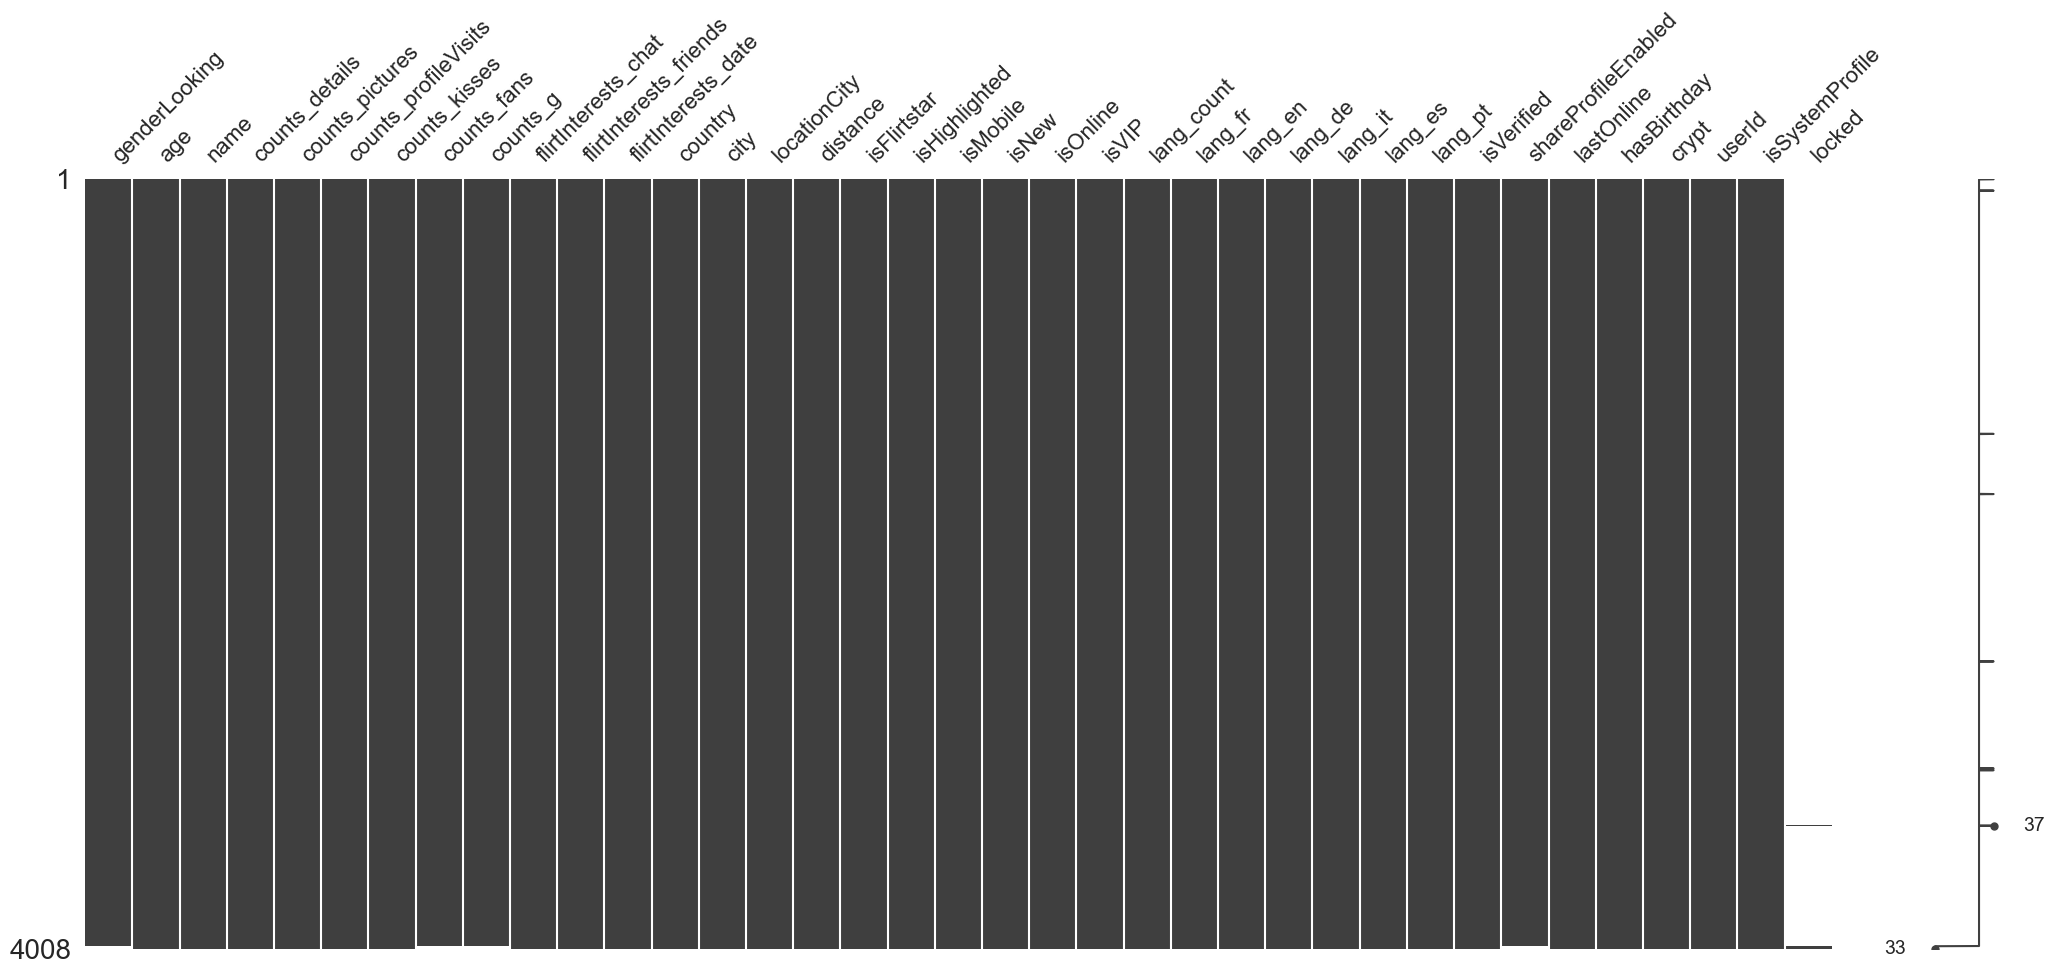

In [22]:
import missingno as msno
msno.matrix(manipulated_data)

In [23]:
manipulated_data.head()

,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,flirtInterests_chat,...,lang_es,lang_pt,isVerified,shareProfileEnabled,lastOnline,hasBirthday,crypt,userId,isSystemProfile,locked
0,M,25,daeni,1.00,4,8279,239,0.0,3.0,1,...,0,0,0,1.0,25/04/2015 20:43,0,0.0,4e3842f79b70e7ea57000064,0.0,0.0
1,M,22,italiana 92,0.85,5,663,13,0.0,0.0,1,...,0,0,0,1.0,26/04/2015 09:19,0,0.0,4e3d34bf5d2bce7b160006a3,0.0,0.0
2,M,21,Lauraaa,0.00,4,1369,88,0.0,2.0,0,...,0,0,0,1.0,06/04/2015 14:24,0,0.0,4ec96c090dc82cb25d00000a,0.0,NaN
3,none,20,Qqkwmdowlo,0.12,3,22187,1015,2.0,3.0,1,...,0,0,0,1.0,07/04/2015 11:21,0,0.0,4eef8b81ebf2c8f64000000c,0.0,NaN
4,M,21,schaessie 3,0.15,12,35262,1413,9.0,12.0,1,...,0,0,0,1.0,06/04/2015 14:25,0,0.0,4ef3cc5aa9d0b3d07d000017,0.0,NaN


In [24]:
df_clean=manipulated_data.copy()

In [25]:

#99% missing values

df_clean= df_clean.drop(columns='locked')

In [26]:
missing_percentage = df_clean.isna().mean() * 100

# Convert to DataFrame
missing_df = pd.DataFrame({
    'Column': missing_percentage.index,
    'Percentage of Missing': missing_percentage.values
})

print(missing_df)

                    Column  Percentage of Missing
0            genderLooking               0.399202
1                      age               0.000000
2                     name               0.000000
3           counts_details               0.000000
4          counts_pictures               0.000000
5     counts_profileVisits               0.000000
6            counts_kisses               0.000000
7              counts_fans               0.399202
8                 counts_g               0.399202
9      flirtInterests_chat               0.000000
10  flirtInterests_friends               0.000000
11     flirtInterests_date               0.000000
12                 country               0.000000
13                    city               0.000000
14            locationCity               0.000000
15                distance               0.000000
16             isFlirtstar               0.000000
17           isHighlighted               0.000000
18                isMobile               0.000000


In [27]:
df_clean.isnull().sum()

genderLooking             16
age                        0
name                       0
counts_details             0
counts_pictures            0
counts_profileVisits       0
counts_kisses              0
counts_fans               16
counts_g                  16
flirtInterests_chat        0
flirtInterests_friends     0
flirtInterests_date        0
country                    0
city                       0
locationCity               0
distance                   0
isFlirtstar                0
isHighlighted              0
isMobile                   0
isNew                      0
isOnline                   0
isVIP                      0
lang_count                 0
lang_fr                    0
lang_en                    0
lang_de                    0
lang_it                    0
lang_es                    0
lang_pt                    0
isVerified                 0
shareProfileEnabled       16
lastOnline                 0
hasBirthday                0
crypt                      0
userId        

In [28]:
#After the outliers is column 'distance' have been removed. KNN is used for imputation
from sklearn.impute import KNNImputer



# Initialize the KNNImputer with 1 neighbor
knn_imputer = KNNImputer(n_neighbors=1)

# Reshape the 'distance' column to a 2D array
distance_reshaped = df_clean['distance'].values.reshape(-1, 1)

# Fit and transform the imputer on the reshaped 'distance' column
imputed_data = pd.DataFrame(knn_imputer.fit_transform(distance_reshaped), columns=['distance'])

# Replace the original 'distance' column with the imputed data
df['distance'] = imputed_data

# Display the imputed DataFrame
print(df_clean.head())


  genderLooking  age         name  counts_details  counts_pictures  \
0             M   25        daeni            1.00                4   
1             M   22  italiana 92            0.85                5   
2             M   21      Lauraaa            0.00                4   
3          none   20   Qqkwmdowlo            0.12                3   
4             M   21  schaessie 3            0.15               12   

   counts_profileVisits  counts_kisses  counts_fans  counts_g  \
0                  8279            239          0.0       3.0   
1                   663             13          0.0       0.0   
2                  1369             88          0.0       2.0   
3                 22187           1015          2.0       3.0   
4                 35262           1413          9.0      12.0   

   flirtInterests_chat  ...  lang_it  lang_es lang_pt isVerified  \
0                    1  ...        0        0       0          0   
1                    1  ...        1        0       

In [29]:
df_clean['counts_fans'].value_counts()

0.0      3019
1.0       394
2.0       157
3.0        70
4.0        48
         ... 
24.0        1
110.0       1
174.0       1
59.0        1
81.0        1
Name: counts_fans, Length: 80, dtype: int64

In [30]:
df_clean['counts_g'].value_counts()

0.0     3858
1.0       57
2.0       22
3.0       19
4.0       11
10.0       5
7.0        3
5.0        3
8.0        2
11.0       2
6.0        2
12.0       2
20.0       1
43.0       1
13.0       1
9.0        1
15.0       1
39.0       1
Name: counts_g, dtype: int64

In [31]:
df_clean['shareProfileEnabled'].value_counts()

1.0    3835
0.0     157
Name: shareProfileEnabled, dtype: int64

In [32]:
#fixing last columns with NA
df_clean['genderLooking']= df_clean['genderLooking'].fillna('none')
df_clean['counts_fans']= df_clean['counts_fans'].fillna(0)
df_clean['counts_g']= df_clean['counts_g'].fillna(0)
df_clean['shareProfileEnabled']=df_clean['shareProfileEnabled'].fillna(0)

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4008 entries, 0 to 6922
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   genderLooking           4008 non-null   string 
 1   age                     4008 non-null   int64  
 2   name                    4008 non-null   string 
 3   counts_details          4008 non-null   float64
 4   counts_pictures         4008 non-null   int64  
 5   counts_profileVisits    4008 non-null   int64  
 6   counts_kisses           4008 non-null   int64  
 7   counts_fans             4008 non-null   float64
 8   counts_g                4008 non-null   float64
 9   flirtInterests_chat     4008 non-null   int64  
 10  flirtInterests_friends  4008 non-null   int64  
 11  flirtInterests_date     4008 non-null   int64  
 12  country                 4008 non-null   string 
 13  city                    4008 non-null   string 
 14  locationCity            4008 non-null   

In [34]:
df_clean.isnull().sum()

genderLooking             0
age                       0
name                      0
counts_details            0
counts_pictures           0
counts_profileVisits      0
counts_kisses             0
counts_fans               0
counts_g                  0
flirtInterests_chat       0
flirtInterests_friends    0
flirtInterests_date       0
country                   0
city                      0
locationCity              0
distance                  0
isFlirtstar               0
isHighlighted             0
isMobile                  0
isNew                     0
isOnline                  0
isVIP                     0
lang_count                0
lang_fr                   0
lang_en                   0
lang_de                   0
lang_it                   0
lang_es                   0
lang_pt                   0
isVerified                0
shareProfileEnabled       0
lastOnline                0
hasBirthday               0
crypt                     0
userId                    0
isSystemProfile     

In [35]:
df_clean.to_csv('Dating_app_clean')

In [36]:
import pickle
#Write a pickle file
with open('Dating_app_clean.pkl', 'wb') as f:
    pickle.dump(df_clean, f)

print("Dating_app_clean")

Dating_app_clean
